# Introduction


Banking industry evolves at a rapid pace with new technology innovations, changing consumer dynamics, geopolitical movements and evolving demographics. Currently we are in the midst of and industrial revolution in banking industry which new models and technologies will change the way business is conducted. 

Lots of new fintech firms or bank tech firms have erupted in recent times to target newer groups of consumers who prefer to do things virtually. Some banks have also developed solutions to target thin-file customers. For example, technology can help monitor various alternative sources of information for example on creditworthiness, like ensuring they are paying rent and utilities on time.
    
There are many areas in this evolving industry where Machine Learning can be beneficial. All these potensial areas, require advanced customer's data analysis with high accuracy and prediction capabilities. Among these areas are:

1. Manage portfolios with algorithms: AI and machine learning could streamline the process for developing a portfolio by assessing a customer’s goals and risk tolerance to develop an individualized portfolio.
2. Conduct High-Frequency Trading: Trading has the potential to accelerate at a faster pace when AI and machine learning algorithms are utilized for trading decisions. 
3. Detect Frauds And Threats to Financial Systems: Routine checks of risk factors that could affect customer information can provide an understanding of the potential threats. As a result, the response of initial invasion detection can be quicker, and the security at financial institutions can flag the unusual behavior for monitoring. 
    
In this project, as a step toward fulfilling these ends, advanced data analysis tools are used to predict and identify which customers of Santander bank will make a specific transaction in the future, irrespective of the amount of money transacted. 

The data has been provided by Santander bank as a competition for kagglers on kaggle website. The dataset has 200k observations and 200 column variables for each customer and a class observation defining whether the customer makes a transaction or not. The target is to predict a binary classification response with highest posible accuracy which will be evaluated by comparing the real data from Santander bank and the predicted values for a separate test data set. 

For this project, logistic regression, Decision tree with gradient boosting and K-fold cross validation, Augmented Decision tree with gradient boosting and KNN methods are used and compared. The results from this project were among the top 10 percent accurate predictions for the unseen datasets and has been awarded the Bronze medal in Kaggle website.  

# Data Engineering and Visualization

Data analysis is performed using Python. as mentioned before the dataset has 200k observations with 202 columns, an ID-code, target response of zero/one and 200 features. To prepare the dataset, the ID-codes have been removed from the dataset, unknown variables are chacked and data set is adjusted using *Pandas* library. 



In [1]:


import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)      



In [26]:
df = pd.read_csv('../../data/train.csv')

In [3]:
# print(df.head(3))

In [27]:
df = df.drop(columns=['ID_code'])

In [28]:
df = df.rename(index=str, columns={"target": "y"})

In [6]:
#print(df.head(3))

In [29]:
X = df.iloc[:,1:201]
#print(X)

In [30]:
Y = df.iloc[:,0]
#print(Y)

## Balanced vs. Unbalanced data set

Balanced and unbalanced data-sets usually behave very differently in terms of the degree of accuracy in classifications. To investigate the balance in this dataset, the countplot of the target values which are considered as response "y", are plotted using the *matplot* library. The demonstrated number of observations in the two target classes demonstrate and unbalance dataset, since the number of customers willing to make a future transaction is considerably lower than those who will not make any. The percentage of ones in the data-set is about 10 percent.

Different techniques can be used to find better models for classification of imballanced data-sets. Collecting more data, resampling the dataset, generating synthetic samples and trying penalized models are among the useful ones.

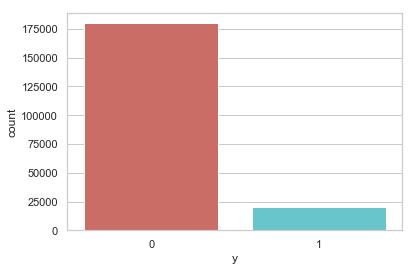

In [31]:
#countplot of the response
sns.countplot(x='y',data=df, palette='hls')
plt.show()

## Feature Distribution Analysis

Distribution of features are also demonstrated as follows for the first and second hundred features, figures.....and ... respectively. It can be observed that considerable number of features have significant different distribution for the two target values of 0 and 1. For example, var_0, var_1, var_2, var_5, var_9, var_13, var_106, var_109, var_139 and many others. Also some features, like var_2, var_13, var_26, var_55, var_175, var_184, var_196 show distributions resembling the bivariate distribution.



In [235]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

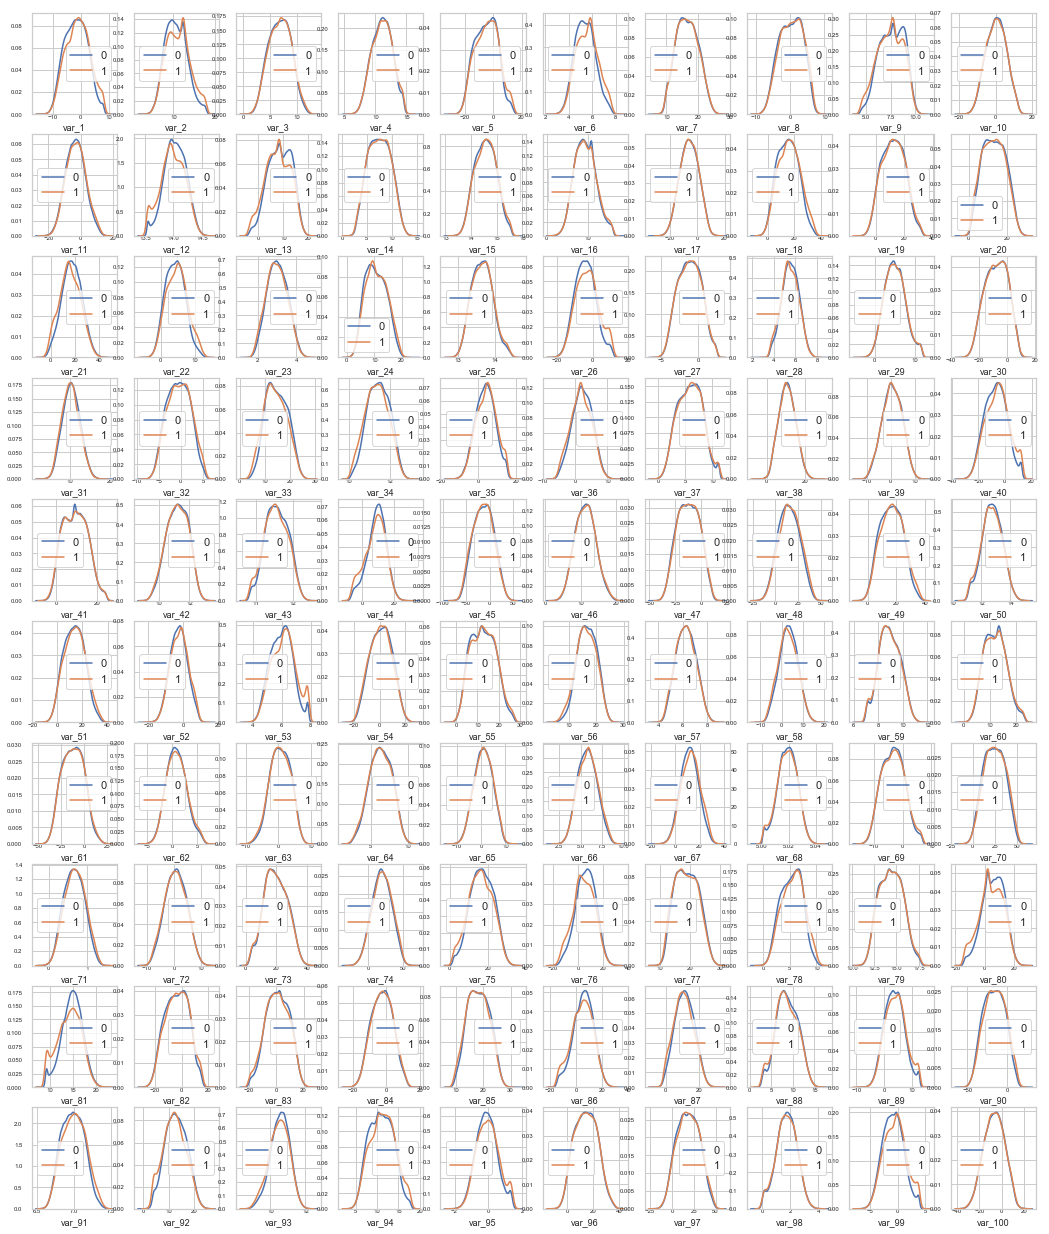

In [236]:
t0 = df.loc[df['y'] == 0]
t1 = df.loc[df['y'] == 1]
features = df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

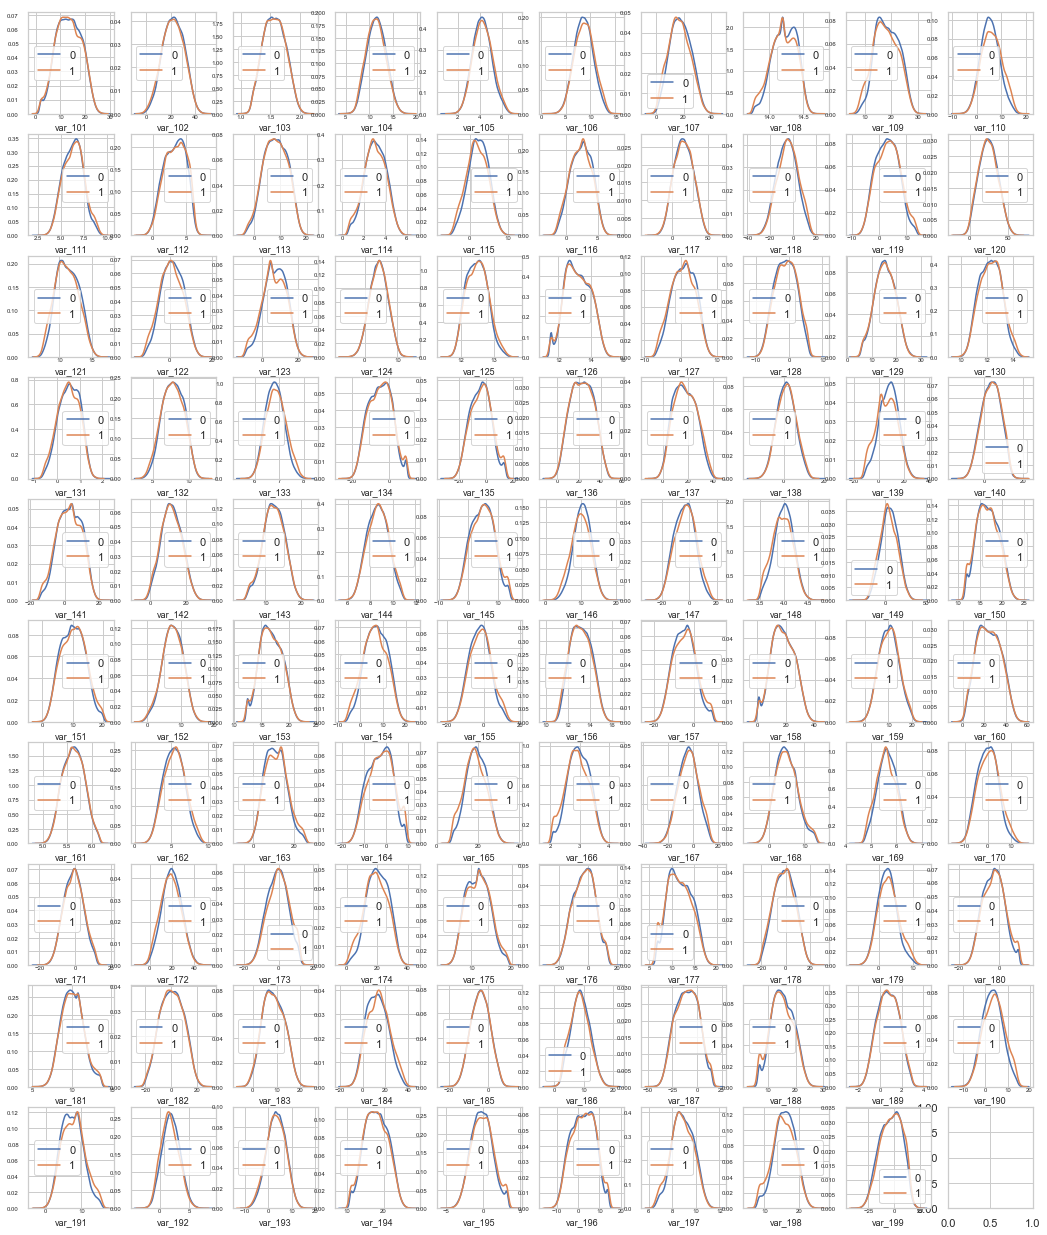

In [237]:
features = df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

## Feature Correlation Analysis

In [44]:
#Feature correlations (top 10)
correlations = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)


,level_0,level_1,0
9890,var_193,var_172,0.008163
9891,var_172,var_193,0.008163
9892,var_162,var_127,0.008555
9893,var_127,var_162,0.008555
9894,var_122,var_132,0.008956
9895,var_132,var_122,0.008956
9896,var_146,var_169,0.009071
9897,var_169,var_146,0.009071
9898,var_183,var_189,0.009359
9899,var_189,var_183,0.009359


In [238]:
correlations.head(10)


,level_0,level_1,0
0,var_109,var_126,1.313947e-07
1,var_126,var_109,1.313947e-07
2,var_177,var_100,3.116544e-07
3,var_100,var_177,3.116544e-07
4,var_150,var_116,6.628008e-07
5,var_116,var_150,6.628008e-07
6,var_173,var_176,1.318335e-06
7,var_176,var_173,1.318335e-06
8,var_109,var_157,2.494615e-06
9,var_157,var_109,2.494615e-06


It can be observed that the correlation between the features are very small and negligible.

In [118]:
#t0 = df.loc[df['target'] == 0]
#t1 = df.loc[df['target'] == 1]
#plt.figure(figsize=(16,6))
#plt.title("Distribution of mean values per row in the train set")
#sns.distplot(t0[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 0')
#sns.distplot(t1[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 1')
#plt.legend(); plt.show()

##  PCA

To find a low-dimensional representation of the data that captures as much of
the information as possible, PCA analysis is performed using the *sklearn.decomposition* library. PCA is sensitive to standardization so the features are standardized before PCA is applied. For standardization *sklearn.preprocessing* library has been used. In PCA we are interested in the components that maximize the variance. 

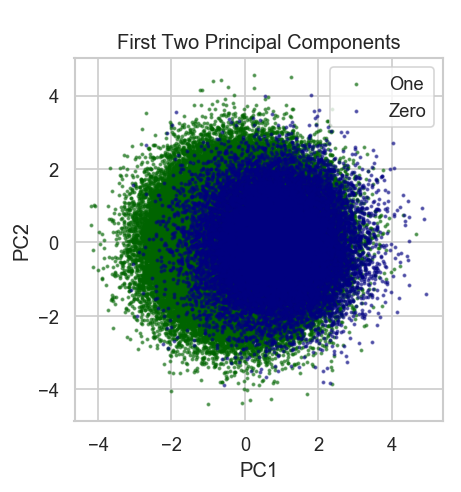

In [166]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,1:]
y = df.iloc[:,0]
#standardization
X = StandardScaler().fit_transform(X)


pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(pca, Y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='One', s=2, color='darkgreen')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Zero', s=2, color='Navy')
plt.legend()
plt.title('\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

Based on Figure......., accurate classification of green dots from blue ones, would be the purpose of this project. It can be observed that when PC1 has higher values the number of Zeros increases and to catch higher portion of the "ones" we would need more decreases in PC1 value. It also shows that a radial kernel might be helpful to some extent in finding a linear decision boundary.

## Train/Test Split

The dataset is randomly splitted into two categories of train and test sets. Test set is considered to have 33 percent of the whole dataset, 66'000 random observations of the original 200'000.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=0)

In [9]:
#X_train.shape

# Logistic regression 


Logistic regresssion fit is applied on the train set.

In [241]:
#Logistic fit
classifier = LogisticRegression(random_state=0,solver='lbfgs',max_iter=3000,tol=0.01)
classifier.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.01, verbose=0, warm_start=False)

Confusion matrix is shown as follows, with TP=1799, FP= 846, TN= 58455, FN= 4900.

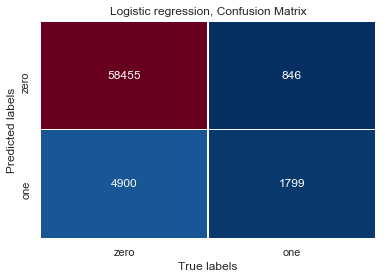

In [242]:
#prediction and confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     
Y_pred = classifier.predict(X_test)
labels = ['one', 'zero']
cm = confusion_matrix(Y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="RdBu_r", cbar=False ); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Logistic regression, Confusion Matrix'); 
ax.xaxis.set_ticklabels(['zero', 'one']); ax.yaxis.set_ticklabels(['zero', 'one']);

## ROC Curve

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
ROC curve is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.
(Sensitivity)True Positive Rate = True Positives / (True Positives + False Negatives)
The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives.
(Specificity) = True Negatives / (True Negatives + False Positives)


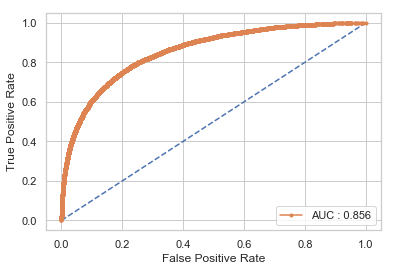

In [244]:
#AUC calculation:
from sklearn.datasets import make_classification
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
#print('AUC: %.0.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label= "AUC : %.3f" %auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

# show the plot
pyplot.show()


In [217]:
#print('Accuracy of logistic regression classifier on test set is: {:.2f}'.format(classifier.score(X_test, Y_test)))

## Precision-Recall curve



Precision-Recall curves are used for this study, since the dataset has large class imbalance.

Precision = True Positives / (True Positives + False Positives)
Recall = True Positives / (True Positives + False Negatives)
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds. 
The Percision-Recall curve for the logistic model is as follows:




f1=0.385 auc=0.502 ap=0.502


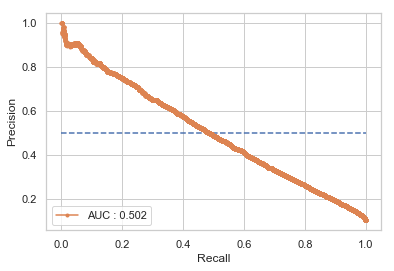

In [245]:
from sklearn.datasets import make_classification
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
Y_pred = classifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)
# calculate F1 score
f1 = f1_score(Y_test, Y_pred)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(Y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label= "AUC : %.3f" %auc)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc="lower left")
# show the plot
pyplot.show()


It can be observed that although the logistic model has an acceptable accuracy in calssification of the zero values it is not doing well in calssification of the unbalanced "one" values.  

In [253]:
#def plot_bank(X, Y, fitted_model):
#    plt.figure(figsize=(9.8,5), dpi=100)
#    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
#        plt.subplot(1,2,i+1)
#        mesh_step_size = 0.01  # step size in the mesh
#        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
#        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
#        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
#        if i == 0:
#            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
#        else:
#            try:
#                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
#            except:
#                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
#                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
#                plt.axis('off')
#                break
#        Z = Z.reshape(xx.shape)
#        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
#        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
#        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
#                   extent=(x_min, x_max, y_min, y_max), origin='lower')
#        plt.title(plot_type + '\n' + 
#                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
#        plt.gca().set_aspect('equal');
#        plt.tight_layout()
#        plt.legend()
#        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
#model = LogisticRegression()
#model.fit(X_train,Y_train)
#plot_bank(X_test, Y_test, model)
#plt.show()

In [18]:
#df_test= pd.read_csv('../../data/test.csv')

In [247]:
#print(df_test)

In [20]:
#df_X_test = df_test.drop(columns = ['ID_code'])

In [248]:
#print (df_test)

In [249]:
#Y_pred = classifier.predict(df_X_test)
#df_Y = pd.DataFrame(Y_pred)
#df_submission = pd.merge(pd.DataFrame(df_test['ID_code']),df_Y,left_index=True,right_index=True)

In [250]:
#df_submission = df_submission.rename(columns={0: 'target'})
#print(df_submission)

In [24]:
#df_submission.to_csv('../data/submit1.csv', encoding='utf-8', index=False)

In [255]:
#plt.hist(Y_pred)


In [256]:
#plt.hist(Y_test)

# Support Vector Machine

In [ ]:
#SVM classifier with linear kernel
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train)  

In [ ]:
Y_pred2 = svclassifier.predict(X_test)
df_Y2 = pd.DataFrame(Y_pred2)
df_submission2 = pd.merge(pd.DataFrame(df_test['ID_code']),df_Y2,left_index=True,right_index=True)
df_submission2 = df_submission2.rename(columns={0: 'target'})
df_submission2.to_csv('../data/submit2.csv', encoding='utf-8', index=False)

In [ ]:
#print(confusion_matrix(Y_test, Y_pred))  
#print(classification_report(Y_test, Y_pred))  

In [ ]:
#SVM Confusion Matrix
print(confusion_matrix(Y_test, Y_pred2))  
print(classification_report(Y_test, Y_pred2))  

# K-Nearest Neighbour

In [11]:
# to standaridize
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
#scaler.fit(X_train)
X_trainscaled = StandardScaler().fit_transform(X_train)
#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  
X_testscaled = StandardScaler().fit_transform(X_train)

In [12]:
from sklearn.neighbors import KNeighborsClassifier  
KNNclassifier = KNeighborsClassifier(n_neighbors=5)  
KNNclassifier.fit(X_trainscaled, Y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
Y_pred3 = KNNclassifier.predict(X_testscaled)  

In [ ]:
#KNN confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred3))  
print(classification_report(Y_test, Y_pred3))  

## Changes of error for different K values

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

In [ ]:
#mean error vs k values
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  


The results from the Logistic regression and KNN method, show that these two methods cannot be reliable in predtiction of the unbalanced classes of this project. 

# Gradient Boosting


As mentioned before and observed from data visualization section, the non-linearity, high dimensional and imbalnced properties of the data-set, demand more complicated approaches and special techniques to get reliable predictive capabilities from our model. 

Tree based gradient boosting is among the models which has shown noticable effectiveness in cases similar to the current project. In the following sections, XGBoost and LightGBM methods are applied. To tackle with the imblanaced property of the dataset, Augmented-LightGBM.


## XGBOOST

Tree based XGboost has been applied using **Azure virtudal machine**, on linux(redhat) with 8 core CPU and 112GB memory. Some connection failure was problematic using **SSH**, therefore, **Mosh** has been used for remote terminal application. It is worth mentioning that **Mosh** allows roaming and supports intermittent connectivity which is robust and responsive specially over Wifi.

stratified K-fold cross validation with 10 splits has been used for XGBOOST training and both ROC-auc and Precision-Recall-auc are considered as its evaluation metrics. The algorithms reports these values of the trainig set every 1000 iterations, and will stop iterating if the Precision-Recall-AUC does not improve over 3000 iterations.

It is worth mentioning that the XGBOOST trainig is performed over the train data set and its evaluation has been investigated over the unseen 0.33 percent test portion of the whole data.



In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)      

In [2]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../../data/train.csv')

In [4]:
train_df, test_df = train_test_split( df, test_size=0.33, random_state=0)

In [5]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
target = train_df['target']

In [6]:
#XGBoost Parameters
param = {
    #'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
    'objective': 'binary:logitraw', # Specify multiclass classification       
    'eta':0.001,
    'gamma':0.01,
    'max_depth':10,
    'min_child_weight':100,
    'subsample':0.05,
    'max_leaves':20,
    'eval_metric':['auc','aucpr'],
    'verbosity':1,
    'nthread':16
}

In [7]:
#Stratified K-fold method for xgboost
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = xgb.DMatrix(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = xgb.DMatrix(train_df.iloc[val_idx][features], label=target.iloc[val_idx])
    
    num_round = 1000000
    clf = xgb.train(param, trn_data, num_round, evals = [(trn_data, 'train'), (val_data, 'valid')], early_stopping_rounds=3000, verbose_eval=1000)
    train_data =xgb.DMatrix(train_df.iloc[val_idx][features])
    oof[val_idx] = clf.predict(train_data, ntree_limit=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([fold_importance_df], axis=0)
    test_data = xgb.DMatrix(test_df[features])
    predictions += clf.predict(test_data, ntree_limit=clf.best_iteration) / folds.n_splits
    
    #val_data2 = xgb.DMatrix(test_df.iloc[val_idxx][features], label=target.iloc[val_idxx])
    #oof2[val_idxx] = clf.predict(test_data, ntree_limit=clf.best_iteration)

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))
print("CV score: {:<8.5f}".format(average_precision_score(target, oof)))



Fold 0
[0]	train-auc:0.624988	train-aucpr:0.148401	valid-auc:0.613317	valid-aucpr:0.142832
Multiple eval metrics have been passed: 'valid-aucpr' will be used for early stopping.

Will train until valid-aucpr hasn't improved in 3000 rounds.
[1000]	train-auc:0.785757	train-aucpr:0.302046	valid-auc:0.763632	valid-aucpr:0.279725
[2000]	train-auc:0.796007	train-aucpr:0.336869	valid-auc:0.773265	valid-aucpr:0.30748
[3000]	train-auc:0.805787	train-aucpr:0.366636	valid-auc:0.782988	valid-aucpr:0.332156
[4000]	train-auc:0.814082	train-aucpr:0.389184	valid-auc:0.791137	valid-aucpr:0.350573
[5000]	train-auc:0.821804	train-aucpr:0.409129	valid-auc:0.799261	valid-aucpr:0.368451
[6000]	train-auc:0.827848	train-aucpr:0.424444	valid-auc:0.805427	valid-aucpr:0.382375
[7000]	train-auc:0.832889	train-aucpr:0.436697	valid-auc:0.810509	valid-aucpr:0.394058
[8000]	train-auc:0.837184	train-aucpr:0.447297	valid-auc:0.814801	valid-aucpr:0.403481
[9000]	train-auc:0.840411	train-aucpr:0.45528	valid-auc:0.81801	v

[46000]	train-auc:0.868781	train-aucpr:0.521546	valid-auc:0.859049	valid-aucpr:0.483896
[47000]	train-auc:0.868945	train-aucpr:0.521925	valid-auc:0.859107	valid-aucpr:0.484181
[48000]	train-auc:0.869069	train-aucpr:0.522191	valid-auc:0.859156	valid-aucpr:0.484178
[49000]	train-auc:0.869199	train-aucpr:0.522419	valid-auc:0.859182	valid-aucpr:0.484187
[50000]	train-auc:0.869347	train-aucpr:0.522679	valid-auc:0.859144	valid-aucpr:0.48434
[51000]	train-auc:0.869483	train-aucpr:0.522987	valid-auc:0.859088	valid-aucpr:0.484213
[52000]	train-auc:0.869612	train-aucpr:0.523265	valid-auc:0.859129	valid-aucpr:0.484141
Stopping. Best iteration:
[49508]	train-auc:0.869262	train-aucpr:0.522532	valid-auc:0.859182	valid-aucpr:0.484408

Fold 2
[0]	train-auc:0.619347	train-aucpr:0.143832	valid-auc:0.618329	valid-aucpr:0.144401
Multiple eval metrics have been passed: 'valid-aucpr' will be used for early stopping.

Will train until valid-aucpr hasn't improved in 3000 rounds.
[1000]	train-auc:0.782446	trai

[33000]	train-auc:0.867026	train-aucpr:0.51757	valid-auc:0.852905	valid-aucpr:0.475109
[34000]	train-auc:0.867264	train-aucpr:0.517955	valid-auc:0.853029	valid-aucpr:0.475349
[35000]	train-auc:0.867483	train-aucpr:0.518349	valid-auc:0.853147	valid-aucpr:0.475854
[36000]	train-auc:0.867713	train-aucpr:0.518786	valid-auc:0.853288	valid-aucpr:0.475706
[37000]	train-auc:0.867895	train-aucpr:0.519119	valid-auc:0.853398	valid-aucpr:0.475703
[38000]	train-auc:0.868099	train-aucpr:0.519488	valid-auc:0.853487	valid-aucpr:0.475686
Stopping. Best iteration:
[35298]	train-auc:0.867554	train-aucpr:0.518489	valid-auc:0.853176	valid-aucpr:0.475911

Fold 4
[0]	train-auc:0.624351	train-aucpr:0.147187	valid-auc:0.618957	valid-aucpr:0.143028
Multiple eval metrics have been passed: 'valid-aucpr' will be used for early stopping.

Will train until valid-aucpr hasn't improved in 3000 rounds.
[1000]	train-auc:0.779814	train-aucpr:0.295839	valid-auc:0.757783	valid-aucpr:0.262776
[2000]	train-auc:0.792124	train

KeyboardInterrupt: 

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, '../../models/modelXGBoost.pkl', compress=9)

In [ ]:
sub_df = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("submission.csv", index=False)

## LightGBM

LightGBM is very similar to XGBOOST but has slight differences in how the trees are being created. It usually outperforms XGBOOSt in accuracy, speed and memory usage. LightGBM is also a capable algorithm in dealing with high dimensional data-sets. Due to all these features LightGBM has been considered a good candidate for this calssification project. 

Although using LightGBM even with similar settings to XGBOOST application leads to slight improvements in the model, the major issue of imbalanced dataset would stil be problematic leading to miss-classifications. Some techniques can be used to tackle this problem.



### Dealing with the imbalanced data-set

In order to tackle with the imblanace of classes in the dataset we can think of different approaches. Collecting more data, resampling the dataset, generating synthetic samples and trying penalized models are among the useful ones. Oversampling or Undersampling which respectively refer to increasing the number of samples by duplicating the smaller class or decreasing the number of classes by removing the majority class elements to make them equal or similar, are considered effective approaches for imbalnced datasets. However, a problem arises with this approach and that is the alteration of original feature distributions. 
In this project another augmenting approach has been used to weaken the effect of imbalanced classes. It works similar to oversampling but it increases the number of samples by increasing both minor and major classes though with different coefficients. Using this method the overall distribution of the features would get less altered while the sample sizes are also increased.

The augmentation or applied to this project doubles the class of zeros and triples the class of ones. Afterwards, LightGBM has been applied using **Azure virtudal machine**, on linux(redhat) with 8 core CPU and 112GB memory with remote terminal connection using **Mosh**.

In [108]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)      

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=1)

In [109]:
#df = pd.read_csv('../../data/train.csv')
df_train = pd.read_csv('../../data/train.csv')
df_test = pd.read_csv('../../data/test.csv')

In [110]:

#df_train, df_test = train_test_split( df, test_size=0.50, random_state=42)

In [111]:
# Using the mask to filter out 1s . 
y = df_train['target']
y.head()
x = df_train[y > 0].copy()

In [112]:
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [113]:
random_state = 42

In [114]:
lgb_params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 13,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    "min_sum_hessian_in_leaf" : 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
    #"lambda_l1" : 5,
    #"lambda_l2" : 5,
    "bagging_seed" : random_state,
    "verbosity" : 1,
    "seed": random_state,
    'num_threads': 16,
}

In [115]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
oof = df_train[['ID_code', 'target']]
oof['predict'] = 0
predictions = df_test[['ID_code']]
val_aucs = []
feature_importance_df = pd.DataFrame()

In [116]:
features = [col for col in df_train.columns if col not in ['target', 'ID_code']]
X_test = df_test[features].values

In [ ]:
for fold, (trn_idx, val_idx) in enumerate(skf.split(df_train, df_train['target'])):
    X_train, y_train = df_train.iloc[trn_idx][features], df_train.iloc[trn_idx]['target']
    X_valid, y_valid = df_train.iloc[val_idx][features], df_train.iloc[val_idx]['target']
   # X_train, y_train = df_train.iloc[trn_idx][features], df_train.iloc[trn_idx]['target']
   # X_valid, y_valid = df_train.iloc[val_idx][features], df_train.iloc[val_idx]['target']
    
    N = 5
    p_valid,yp = 0,0
    for i in range(N):
        X_t, y_t = augment(X_train.values, y_train.values)
        X_t = pd.DataFrame(X_t)
        X_t = X_t.add_prefix('var_')
    
        trn_data = lgb.Dataset(X_t, label=y_t)
        val_data = lgb.Dataset(X_valid, label=y_valid)
        evals_result = {}
        lgb_clf = lgb.train(lgb_params,
                        trn_data,
                        100000,
                        valid_sets = [trn_data, val_data],
                        early_stopping_rounds=3000,
                        verbose_eval = 1000,
                        evals_result=evals_result
                       )
        p_valid += lgb_clf.predict(X_valid)
        yp += lgb_clf.predict(X_test)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = lgb_clf.feature_importance()
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    oof['predict'][val_idx] = p_valid/N
    val_score = roc_auc_score(y_valid, p_valid)
    val_aucs.append(val_score)
    
    predictions['fold{}'.format(fold+1)] = yp/N


Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.893678	valid_1's auc: 0.8817
[2000]	training's auc: 0.902207	valid_1's auc: 0.888803
[3000]	training's auc: 0.908331	valid_1's auc: 0.893131
[4000]	training's auc: 0.913035	valid_1's auc: 0.896068
[5000]	training's auc: 0.916709	valid_1's auc: 0.897913
[6000]	training's auc: 0.919681	valid_1's auc: 0.89895
[7000]	training's auc: 0.922227	valid_1's auc: 0.899554
[8000]	training's auc: 0.924566	valid_1's auc: 0.899811
[9000]	training's auc: 0.926739	valid_1's auc: 0.900055
[10000]	training's auc: 0.928857	valid_1's auc: 0.900196
[11000]	training's auc: 0.930902	valid_1's auc: 0.900137
[12000]	training's auc: 0.932894	valid_1's auc: 0.900186
[13000]	training's auc: 0.934842	valid_1's auc: 0.90007
Early stopping, best iteration is:
[10258]	training's auc: 0.929382	valid_1's auc: 0.900228
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.892258	valid_1's auc: 0.881

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, '../../models/modelLightGBM_AUG2.pkl', compress=9)

In [ ]:
%precision 3

### Evaluating the AUC values:

In [ ]:
mean_auc = np.mean(val_aucs)
std_auc = np.std(val_aucs)
all_auc = roc_auc_score(oof['target'], oof['predict'])
print("Mean auc: %.9f, std: %.9f. All auc: %.9f." % (mean_auc, std_auc, all_auc))

### Feature Importance Plot

In [ ]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [ ]:
# submission
predictions['target'] = np.mean(predictions[[col for col in predictions.columns if col not in ['ID_code', 'target']]].values, axis=1)
predictions.to_csv('lgb_all_predictions.csv', index=None)
sub_df = pd.DataFrame({"ID_code":df_test["ID_code"].values})
sub_df["target"] = predictions['target']
sub_df.to_csv("../data/lgb_submission_14.csv", index=False)
oof.to_csv('../data/lgb_oof_14.csv', index=False)